# Algorithm 2: Line-Regression

```
1. Initialize sliding window size Nf 
2. Fit a line to every Nf consecutive points
3. Compute a line fidelity array. Each element of the array contains the sum of Mahalanobis distances between every three adjacent windows
4. Construct line segments by scanning the fidelity array for consecutive elements having values less than a threshold
5. Merge overlapped line segments and recompute line parameters for each segment
```

## Reference

Roland Siegwart, Illah Nourbakhsh, and Davide Scaramuzza. Introduction to Autonomous Mobile Robots. MIT Press, 2nd edition, 2011.

In [1]:
## ToDo

In [ ]:
## Work in progress

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from LineRegression.lineregression import LineRegression

In [2]:
testdata = []
for i in range(6):
    with open('/Users/hdumcke/git/lidar-simulator/jupyternb/data/testLineExtraction%s.mat.pickle' % str(i+1), 'rb') as f:
        testdata.append(pickle.load(f))

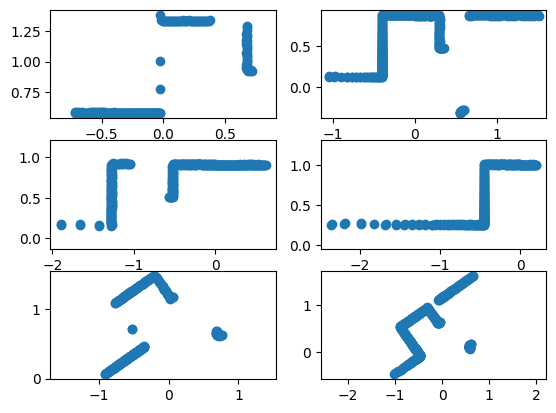

In [3]:
fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    axs[row_index, column_index].scatter(x, y)

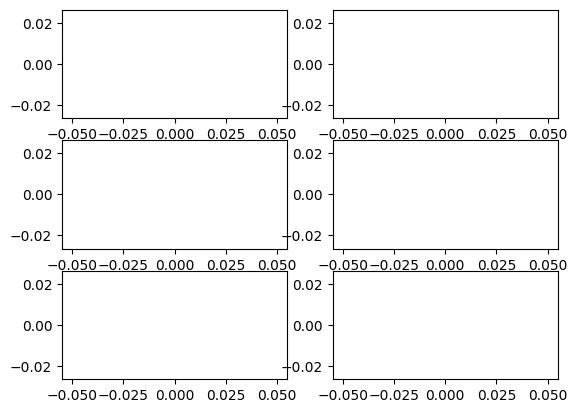

In [4]:
lr = LineRegression()

fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    segend, seglen, pointIdx_a = lr.extractLines(x[0], y[0])
    for j in range(segend.shape[0]):
        axs[row_index, column_index].plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])